# MNIST Single Layer Network

Note: This notebook is desinged to run with Python3 and GPU runtime.

![Python 3 and CPU runtime](https://raw.githubusercontent.com/enakai00/colab_tfbook/master/docs/imgs/runtime_gpu.png)

####[MSL-01]
Import modules and set random seeds.

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt

import tensorflow as tf
import keras
from keras import layers
from keras import models
from keras import initializers
from keras.datasets import mnist

np.random.seed(20190228)
tf.set_random_seed(20190228)

plt.rcParams['axes.facecolor'] = 'white'

Using TensorFlow backend.


####[MSL-02]
Download the MNIST dataset and store into NumPy arrays.

In [0]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape(
                  (len(train_images), 784)).astype('float32') / 255
test_images = test_images.reshape(
                  (len(test_images), 784)).astype('float32') / 255
train_labels = keras.utils.to_categorical(train_labels, 10)
test_labels = keras.utils.to_categorical(test_labels, 10)

####[MSL-03]
Define a model with a single hidden layer.

In [3]:
model = models.Sequential()
model.add(layers.Dense(1024, activation='relu', input_shape=(28*28,),
                       kernel_initializer=initializers.TruncatedNormal(),
                       name='hidden'))
model.add(layers.Dense(10, activation='softmax', name='softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 1024)              803840    
_________________________________________________________________
softmax (Dense)              (None, 10)                10250     
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________


####[MSL-04]
Compile the model using the Adam optimizer, and Cross entroy as a loss function.

In [0]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['acc'])

####[MSL-05]
Train the model. It acheves the 98.0% accuracy for the test dataset.

In [5]:
history = model.fit(train_images, train_labels,
                    validation_data=(test_images, test_labels),
                    batch_size=128, epochs=10)

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 59us/step - loss: 0.2332 - acc: 0.9328 - val_loss: 0.1144 - val_acc: 0.9664
Epoch 2/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.0888 - acc: 0.9737 - val_loss: 0.0853 - val_acc: 0.9721
Epoch 3/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.0563 - acc: 0.9833 - val_loss: 0.0716 - val_acc: 0.9781
Epoch 4/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.0373 - acc: 0.9891 - val_loss: 0.0679 - val_acc: 0.9783
Epoch 5/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.0269 - acc: 0.9925 - val_loss: 0.0567 - val_acc: 0.9825
Epoch 6/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.0202 - acc: 0.9942 - val_loss: 0.0567 - val_acc: 0.9836
Epoch 7/10
60000/60000 [==============================] - 3s 44us/step - loss: 0

####[MSL-06]
Show examples of the prediction result. Three for correct preditions and three for incorrect predictions.

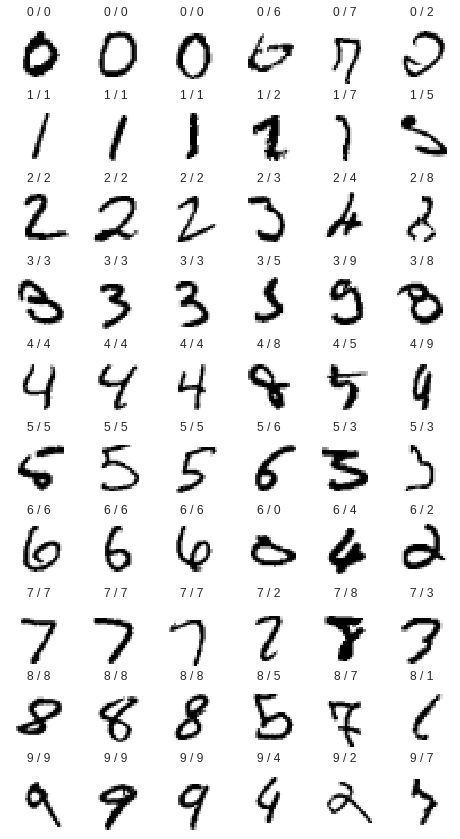

In [6]:
p_val = model.predict(np.array(test_images))
df = DataFrame({'pred': list(map(np.argmax, p_val)),
                'label': list(map(np.argmax, test_labels))})
correct = df[df['pred']==df['label']]
incorrect = df[df['pred']!=df['label']]

fig = plt.figure(figsize=(8, 15))
for i in range(10):
  indices = list(correct[correct['pred']==i].index[:3]) \
              + list(incorrect[incorrect['pred']==i].index[:3])
  for c, image in enumerate(test_images[indices]):
            subplot = fig.add_subplot(10, 6, i*6+c+1)
            subplot.set_xticks([])
            subplot.set_yticks([])
            subplot.set_title('%d / %d' % (i, df['label'][indices[c]]))
            subplot.imshow(image.reshape((28, 28)), vmin=0, vmax=1,
                           cmap=plt.cm.gray_r, interpolation="nearest")